<a href="https://colab.research.google.com/github/dh610/DataMining/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1 :: EDA & Classificaion

## 코랩과 구글 드라이브 연동하기

In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

## 데이터 불러오기 & 살펴보기

In [160]:
# 이번 과제는 numpy, pandas와 같은 데이터를 불러내고 확인, 처리,
# 수정 등을 쉽게 할 수 있는 library를 사용합니다.

# 모듈 이름 뒤에 as를 쓰고 별칭을 적으면 해당 별칭으로 모듈을 호출할 수 있습니다.
# 모듈명: numpy, 별칭: np => numpy를 쓰는 대신 np를 써서 numpy 호출
# 모듈명: pandas, 별칭: pd => pandas를 쓰는 대신 pd를 써서 pandas 호출
import numpy as np
import pandas as pd

In [161]:
# './'는 이 노트북 파일의 현재 위치를 뜻 합니다.
# 노트북 파일과 같은 위치에 데이터 파일을 두어야 아래와 같이 데이터 파일을 불러올 수 있습니다.
# kaggle 원본 데이터 파일과 다릅니다. 반드시 제공된 데이터를 사용하세요!
path = '/content/drive/MyDrive/marketing_campaign_new.csv'

# pandas의 read_csv 함수를 사용하여 csv파일을 DataFrame으로 불러옵니다.
data = pd.read_csv(path)

In [162]:
# DataFrame 혹은 Series와 같은 자료구조에 shape함수를 통해 데이터의 크기와
# 변수의 갯수를 대략적으로 알 수 있습니다.

data.shape # (10000, 23) => 10000 개의 row(행), 23 개의 column(열)을 가진 데이터

(2240, 27)

In [163]:
# DataFrame을 이루고 있는 column의 이름을 확인합니다.

data.columns

Index(['ID', 'Gender', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntToyProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Customer Type', 'Z_CostContact', 'AcceptedCmp',
       'Complain', 'Response'],
      dtype='object')

In [164]:
# DataFrame을 이루고 있는 column 별 데이터의 타입을 확인합니다.

data.dtypes

ID                       int64
Gender                  object
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntToyProducts         float64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Customer Type           object
Z_CostContact          float64
AcceptedCmp              int64
Complain                 int64
Response                 int64
dtype: object

In [165]:
# describe()는 각 column에 대해 통계량을 요약해주는 함수입니다.
# 기본적으로 NaN(누락데이터)는 제외하고 데이터 요약이 수행됩니다.

data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,AcceptedCmp,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.248661,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,49.370833,0.584821,0.009375,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,30.033454,1.313666,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,23.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,49.500000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,74.250000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,99.000000,5.000000,1.000000,1.000000


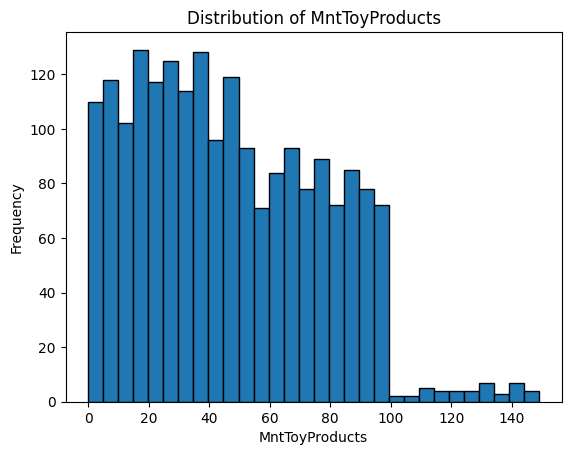

In [166]:
import matplotlib.pyplot as plt

# 'data' 데이터프레임의 'MntToyProducts' 컬럼에 대한 히스토그램 생성
plt.hist(data['MntToyProducts'], bins=30, edgecolor='black')

# 그래프 제목 및 축 레이블 설정
plt.title('Distribution of MntToyProducts')
plt.xlabel('MntToyProducts')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()

In [167]:
# mode()는 각 컬럼에 대해 최빈값을 계산해주는 함수입니다.
# 기본적으로 NaN(누락데이터)는 제외하고 데이터 요약이 수행됩니다.
# mode() 함수는 모든 컬럼 유형에 대해 작동하며, 숫자형, 문자열, 범주형 데이터 등 모든 컬럼 타입에서 사용할 수 있습니다.

data.mode().iloc[0]

ID                              0
Gender                          M
Year_Birth                 1976.0
Education              Graduation
Marital_Status            Married
Income                    52247.0
Kidhome                       0.0
Teenhome                      0.0
Dt_Customer            31-08-2012
Recency                      56.0
MntWines                      2.0
MntFruits                     0.0
MntMeatProducts               7.0
MntFishProducts               0.0
MntSweetProducts              0.0
MntToyProducts               17.0
MntGoldProds                  1.0
NumDealsPurchases             1.0
NumWebPurchases               2.0
NumCatalogPurchases           0.0
NumStorePurchases             3.0
NumWebVisitsMonth             7.0
Customer Type              common
Z_CostContact                32.0
AcceptedCmp                   0.0
Complain                      0.0
Response                      0.0
Name: 0, dtype: object

## 문제 1 :: 변수의 타입

* 보고서에 설명된 것을 바탕을 주어진 데이터의 변수들의 타입을 보고서에 기술하세요.

  * 작성 형식) : 1. 변수 이름: categorical
  * 작성 예시) 1. ID: Numeric

정답)

* ID:
* Gender:
* Year_Birth:
* Education:
* Marital_Status:
* Income:
* Kidhome:
* Recency:
* MntWines:
* NumWebPurchases:
* AcceptedCmp:
* Complain:
* Customer Type:
* Response:

## 결측값과 중복값 확인하기
결측값과 중복값은 데이터 분석 결과에 큰 영향을 줍니다.   
제공된 데이터에 결측값과 중복값이 있는지 알아봅시다.

In [168]:
# isnull()는 DataFrame에 있는 결측치(NA)를 boolean 값으로 반환하는 함수입니다.
# 결측치가 있으면 True를 반환합니다.

data.isnull().head()

,ID,Gender,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer Type,Z_CostContact,AcceptedCmp,Complain,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [169]:
# isnull()에 sum() 를 결합하여 DataFrame에 있는 결측치의 합을 구합니다.

data.isnull().sum() # 문제3에서 KNN Imputer를 사용하여 결측값을 보정할 예정

ID                        0
Gender                    0
Year_Birth                0
Education                 0
Marital_Status            0
Income                    0
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntWines                  0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntToyProducts          225
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
Customer Type             0
Z_CostContact          2000
AcceptedCmp               0
Complain                  0
Response                  0
dtype: int64

In [170]:
# Income에 있는 적은 량의 결측치는 해당 열의 평균으로 채워줍니다.

#data['Income'].fillna(data['Income'].mean(), inplace=True)
mean_income = np.floor(data['Income'].mean())
data['Income'].fillna(mean_income, inplace=True)

In [171]:
# 결측치가 너무 많은 Z_CostContact는 결측값을 보정하여도 유의미한 데이터를 가지지 못하기 떄문에 제거해 줍니다.

data = data.drop(['Z_CostContact'], axis=1)

In [172]:
# duplicated()는 중복된 데이터를 Series 형식으로 반환합니다.

data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [173]:
# duplicated()에 sum()을 결합하여 DataFrame에 있는 중복 데이터의 합을 구합니다.

data.duplicated().sum()

0

## 문제 2 :: 데이터 정리


### 문제 2-1
제공된 데이터에서 categorical 변수들을 주어진 조건에 따라 인코딩하고 작성한 코드를 캡처 후 보고서에 업로드 하세요.

* data에서 Gender 열의 데이터 값을 `M`(Male)일 경우 0, `F`(Female)일 경우 1로 인코딩하세요.

* data에서 Customer Type 열의 데이터 값을 `common`일 경우 0, `VIP`일 경우 1로 인코딩하세요.

* data에서 Marital_Status 열의 데이터 값을 `Single`일 경우 0, `Married`일 경우 1, `Divorced`일 경우 2로 인코딩하세요.

* data에서 Education 열의 데이터 값을 `Graduation`일 경우 0, `PhD`일 경우 1, `Master`일 경우 2, `Basic`일 경우 3, `2n Cycle`일 경우 4로 인코딩하세요.

In [174]:
data['Gender'].unique()

array(['M', 'F'], dtype=object)

In [175]:
data['Customer Type'].unique()

array(['VIP', 'common'], dtype=object)

In [176]:
data['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [177]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [178]:
################  문제 2-1  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

# 각 열을 replace를 이용해 주어진 값으로 인코딩했다. 다음 블럭에서 integer 타입으로 바꿀 예정이므로 숫자를 정수형태가 아닌 문자열로 저장했다.

data['Gender'] = data['Gender'].replace({ 'M': '0', 'F': '1' })
data['Customer Type'] = data['Customer Type'].replace({ 'common': '0', 'VIP': '1'})
data['Marital_Status'] = data['Marital_Status'].replace({ 'Single': '0', 'Married': '1', 'Divorced': '2'})
data['Education'] = data['Education'].replace({ 'Graduation': '0', 'PhD': '1', 'Master': 2, 'Basic': '3', '2n Cycle': '4'})

################ 코드 끝 ########################
#################################################

In [179]:
# 인코딩한 데이터 열의 데이터 속성을 변환하는 코드
data['Gender'] = data['Gender'].astype('int')
data['Customer Type'] = data['Customer Type'].astype('int')
data['Marital_Status'] = data['Marital_Status'].astype('int')
data['Education'] = data['Education'].astype('int')

### 문제 2-2
오늘 날짜는 2024년 3월 16일 입니다.

`Year_Birth` 열은 현재 년도 단위로 데이터가 구성되어 있습니다.
나이 단위로 데이터를 나타내는 `Age`을 작성하고 캡처하여 보고서에 업로드 하세요.

예)  1957년도 출생 => 2024-1957=67

`DT_Customer` 열은 현재 날짜 단위로 데이터가 구성되어 있습니다.  
년 단위로 데이터를 나타내는 `CustomerTenure`을 작성하고 캡처하여 보고서에 업로드 하세요.

예) 04-09-2012 => (03-16-2024-04-09-2012)/365=11.94 (소수점 셋째자리에서 버림)

**Hint) datetime.strptime**

In [180]:
from datetime import datetime
################  문제 2-2  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

# 2024년 3월 16일의 정보를 today라는 변수에 저장한다.
today = datetime.strptime('16-03-2024', '%d-%m-%Y')

# Age에다가 현재 년도와 'Year_Birth'에 저장된 년도의 차이를 저장했다.
Age = today.year - data['Year_Birth']

# 2-3번에서 'Year_Birth'의 이름을 Age로 변경할 예정이므로, Age의 값을 미리 저장한다.
data['Year_Birth'] = Age

# 'Dt_Customer'의 원소를 strptime을 이용해서 datetime으로 변환했다.
# 그 값을 이용해 today 변수(3월 16일) 과의 차이를 계산하고 365로 나누었다.
# 문자열 formatting을 이용해 소숫점 둘째 자리에서 버렸다.
# 문자열 formatting의 결과이기 때문에 float로 형 변환을 해주었다.
# apply를 통해 해당 열의 모든 원소에 연산이 적용되도록 했다.
CustomerTenure = data['Dt_Customer'].apply(lambda x: float("{:.2f}".format((today - datetime.strptime(x, '%d-%m-%Y')).days / 365)))

# 2-3번에서 'Dt_Customer'의 이름을 CustomerTenure로 변경할 예정이므로, CustomerTenure의 값을 미리 저장한다.
data['Dt_Customer'] = CustomerTenure
################ 코드 끝 ########################
#################################################

In [181]:
data.head()

,ID,Gender,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer Type,AcceptedCmp,Complain,Response
0,5524,0,67,0,0,58138.0,0,0,11.54,58,...,88,3,8,10,4,7,1,0,0,1
1,2174,0,70,0,0,46344.0,1,1,10.03,38,...,6,2,1,1,2,5,0,0,0,0
2,4141,0,59,0,1,71613.0,0,0,10.58,26,...,42,1,8,2,10,4,1,0,0,0
3,6182,1,40,0,1,26646.0,1,0,10.10,26,...,5,2,2,0,4,6,0,0,0,0
4,5324,1,43,1,1,58293.0,1,0,10.16,94,...,15,5,5,3,6,5,0,0,0,0


### 문제 2-3
`Year_Birth`와 `DT_Customer`, `Recency` 열의 이름을 각각 `Age`와 `CustomerTenure`, `Recency_in_years`로 변경하세요.

**코드를 보고서에 캡처하여 업로드하세요.**

In [182]:
################  문제 2-3  #################
# 열 이름 변경하기
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  ##################

# rename을 이용해 열의 값들을 변경하여 data에 저장했다.
data = data.rename(columns={ 'Year_Birth': 'Age', 'Dt_Customer': 'CustomerTenure', 'Recency': 'Recency_in_Years'})

################ 코드 끝  ####################
##############################################

### 문제 2-4
`AcceptedCmp`는 고객이 어떤 캠페인에 참여했는지 나타내는 열입니다.

캠페인은 1, 2, 3, 4, 5 가 존재합니다.

**One-hot encoding**(강의노트 2번 10쪽)을 통해 `AcceptedCmp`를 5개의 열로 변경하세요.

예)  `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`

**코드를 보고서에 캡처하여 업로드하세요.**

In [183]:
################  문제 2-4  #################
# 열 이름 변경하기
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  ##################

# 반복문을 통해 캠페인 1부터 5까지 새 열을 만들어서 해당 캠페인에 참여했으면 1, 아니면 0을 저장했다.
# 해당 열의 모든 원소에 적용하기 위해 apply를 이용했다.
for i in range(1, 6):
  data['AcceptedCmp{:d}'.format(i)] = data['AcceptedCmp'].apply(lambda x: 1 if x == i else 0)

# one-hot encoding을 마쳤으므로 원래의 AcceptedCmp 열은 삭제한다
data = data.drop('AcceptedCmp', axis=1)

################ 코드 끝  ####################
##############################################

In [184]:
data.head()

,ID,Gender,Age,Education,Marital_Status,Income,Kidhome,Teenhome,CustomerTenure,Recency_in_Years,...,NumStorePurchases,NumWebVisitsMonth,Customer Type,Complain,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,5524,0,67,0,0,58138.0,0,0,11.54,58,...,4,7,1,0,1,0,0,0,0,0
1,2174,0,70,0,0,46344.0,1,1,10.03,38,...,2,5,0,0,0,0,0,0,0,0
2,4141,0,59,0,1,71613.0,0,0,10.58,26,...,10,4,1,0,0,0,0,0,0,0
3,6182,1,40,0,1,26646.0,1,0,10.10,26,...,4,6,0,0,0,0,0,0,0,0
4,5324,1,43,1,1,58293.0,1,0,10.16,94,...,6,5,0,0,0,0,0,0,0,0


In [185]:
data.tail()

,ID,Gender,Age,Education,Marital_Status,Income,Kidhome,Teenhome,CustomerTenure,Recency_in_Years,...,NumStorePurchases,NumWebVisitsMonth,Customer Type,Complain,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
2235,10870,1,57,0,1,61223.0,0,1,10.76,46,...,4,5,1,0,0,0,0,0,0,0
2236,4001,1,78,1,1,64014.0,2,1,9.77,56,...,5,7,0,0,0,1,0,0,0,0
2237,7270,0,43,0,2,56981.0,0,0,10.15,91,...,13,6,1,0,0,0,0,0,1,0
2238,8235,0,68,2,1,69245.0,0,1,10.15,8,...,10,3,1,0,0,0,0,0,0,0
2239,9405,1,70,1,1,52869.0,1,1,11.42,40,...,4,7,0,0,1,0,0,0,0,0


In [186]:
data.columns

Index(['ID', 'Gender', 'Age', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'CustomerTenure', 'Recency_in_Years', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntToyProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Customer Type', 'Complain', 'Response',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5'],
      dtype='object')

## 문제 3 :: KNN Imputer

### **`MntToyProducts`** 열과 연관성이 높은 열 찾기


결측값이 있는 모든 행과 결측값이 없는 데이터 사이의 거리를 구할 수 있지만, 계산 시간이 매우 오려 걸려 `MntToyProducts` 열과 가장 연관성이 높은 `Kidhome` 과의 거리를 기준으로 결측값을 보정합니다.

In [187]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Gender,Age,Education,Marital_Status,Income,Kidhome,Teenhome,CustomerTenure,Recency_in_Years,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntToyProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer Type,Complain,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
ID,1.000000,0.010249,-0.000028,-0.017651,0.011032,0.013036,0.002406,-0.002580,-0.000094,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,0.009083,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.006031,0.033883,-0.021968,-0.021614,0.005571,-0.036252,-0.017929,0.002380
Gender,0.010249,1.000000,-0.044213,-0.002854,0.001391,-0.003216,0.013177,0.002470,0.020662,-0.003866,-0.012340,0.007562,-0.012503,-0.018146,0.025821,0.003603,-0.029658,0.026033,-0.012507,-0.026530,-0.002530,0.031582,-0.030706,-0.004546,-0.042239,-0.050732,0.036086,-0.012905,-0.012303,-0.008216
Age,-0.000028,-0.044213,1.000000,-0.036971,0.170129,0.160942,-0.230176,0.352111,-0.022411,0.019871,0.157773,0.017917,0.030872,0.041625,0.018133,-0.191649,0.061818,0.060846,0.145040,0.121275,0.128272,-0.121139,0.090538,0.030128,-0.021325,0.005930,0.014468,-0.048256,0.076014,0.031304
Education,-0.017651,-0.002854,-0.036971,1.000000,0.005904,-0.092242,0.028878,-0.052026,0.000974,-0.025753,-0.067017,-0.060599,-0.075378,-0.029216,-0.036715,0.002855,-0.067252,-0.009192,-0.066299,-0.066781,-0.054023,0.034059,-0.042152,0.001382,-0.018980,-0.028134,0.001242,-0.002372,0.001539,-0.002099
Marital_Status,0.011032,0.001391,0.170129,0.005904,1.000000,0.031406,-0.046232,0.107030,0.009754,0.001056,0.039498,0.009973,-0.030391,-0.000269,0.015914,-0.052649,0.020035,0.043360,0.051162,0.021421,0.030375,0.006647,0.042949,-0.018279,-0.032795,-0.010959,0.029176,-0.016741,0.019690,0.007967
Income,0.013036,-0.003216,0.160942,-0.092242,0.031406,1.000000,-0.425176,0.019018,-0.018577,-0.003947,0.576789,0.428747,0.577802,0.437497,0.436162,-0.355115,0.321978,-0.082290,0.380550,0.586725,0.526489,-0.549824,0.482504,-0.027223,0.132757,0.274921,0.038793,-0.072493,0.104896,0.190280
Kidhome,0.002406,0.013177,-0.230176,0.028878,-0.046232,-0.425176,1.000000,-0.036133,-0.053417,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,0.882415,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,-0.418512,0.040207,-0.080008,-0.172339,-0.053051,0.048906,-0.119915,-0.135727
Teenhome,-0.002580,0.002470,0.352111,-0.052026,0.107030,0.019018,-0.036133,1.000000,0.017468,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.034083,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,0.041650,0.003138,-0.154446,-0.140090,0.013169,-0.021859,0.085458,-0.127341
CustomerTenure,-0.000094,0.020662,-0.022411,0.000974,0.009754,-0.018577,-0.053417,0.017468,1.000000,0.024543,0.166253,0.067037,0.092746,0.080878,0.081332,-0.049221,0.159763,0.218683,0.191968,0.096268,0.110736,0.272538,0.173886,0.033269,0.194576,-0.039692,0.006072,0.014899,0.006121,-0.003689
Recency_in_Years,-0.046524,-0.003866,0.019871,-0.025753,0.001056,-0.003947,0.008827,0.016198,0.024543,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.013027,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,0.002826,0.013231,-0.198437,-0.019283,0.011572,-0.040475,0.029306,0.004674


`MntToyProducts` 와 `Kidhome`의 상관 계수가 0.88인 것으로 보아 두 열이 큰 상관 관계를 가짐을 알 수 있습니다.   따라서 두 열만 골라 X라는 데이터프레임을 만듭니다.

In [188]:
X = data[['MntToyProducts', 'Kidhome']]

### 문제 3-1, 3-2
K-Nearest Neighbor Imputation(강의노트 2번 23쪽)을 이용하여 결측치 채우기

### 문제 3-1
주어진 코드틀에 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 코드를 작성하세요.  
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.



### 문제 3-2
주어진 코드틀에 k개의 "MntToyProducts" 값을 보고 평균을 내어 결측값을 결정하는 코드를 작성하세요.
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [189]:
from tqdm.notebook import tqdm

In [190]:
class Knn_imputer():
  def __init__(self, n_neighbors):

    ## 생성자로 최근접 이웃수(n_neighbors)를 입력 받습니다.
    self.k = n_neighbors

  ## knn 은 lazy learning 입니다.
  def fit(self,X):
      self.X = X

  def predict(self, X):

    for i in tqdm(range(len(X))):
     if pd.isnull(X['MntToyProducts'].iloc[i]): # Arrival Delay 열에 있는 결측값 확인

        distance = self.dist(X, X.iloc[i]) # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 함수
        sorted_dist = sorted(distance.items(), key=lambda x: x[1]) # distance 를 sorting 하기

         ################  문제 3-2  ####################
         # k개의 "MntToyProducts" 값을 보고 평균 내어
         # 값을 결정하기

         # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
         # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
        ################ 코드 시작  #####################

        # sorted_dist의 맨 앞부터 k값까지 슬라이싱 한 것의 평균을 구하여 저장한다.
        # 위에서처럼 X['MntToyProducts'].iloc[i]를 이용하려고 했는데,
        # 경고메시지가 나와서 iloc 대신 loc을 사용했다.
        X.loc[i, 'MntToyProducts'] = np.mean(sorted_dist[0:self.k])

        ################ 코드 끝  ######################
        ##############################################

    return X['MntToyProducts']

  def dist(self, X, y):
    num_train = X.shape[0]

    X = X.drop(['MntToyProducts'], axis=1)
    y = y.drop(['MntToyProducts'])
    dist_dict = {} ## {index : distance} 형태

    for i in range(num_train):

    ################  문제 3-1  ####################
    # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하기
    # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
    # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
    ################ 코드 시작  #####################

    #################################################
    # X와 y는 모두 Kidhome 한 가지 열만 존재하는 상태이다.
    # 그래서 Euclidean distance를 구하는 기본 방법인
    # 차의 제곱의 합을 사용하지 않고,
    # 두 값의 차를 구하여 저장했다.
    #################################################
      dist_dict[i] = abs(X['Kidhome'].iloc[i] - y['Kidhome'])

    ################ 코드 끝  ######################
    ##############################################

    return dist_dict


In [191]:
imputer = Knn_imputer(3)
imputer.fit(X)

# test set에 대해 predict를 진행합니다.
data['MntToyProducts'] = imputer.predict(X) # 오래 걸립니다

  0%|          | 0/2240 [00:00<?, ?it/s]

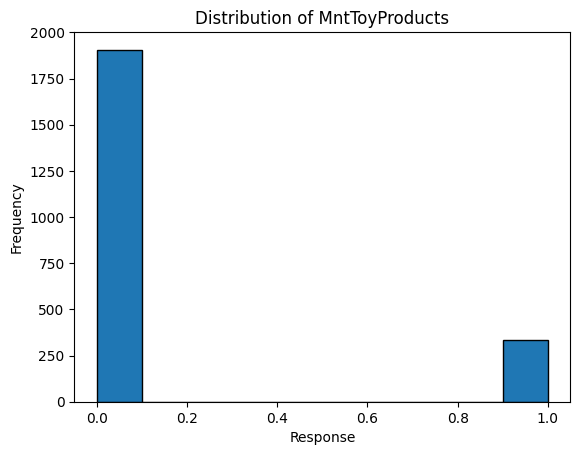

In [192]:
import matplotlib.pyplot as plt

# 'data' 데이터프레임의 'MntToyProducts' 컬럼에 대한 히스토그램 생성
plt.hist(data['Response'], edgecolor='black')

# 그래프 제목 및 축 레이블 설정
plt.title('Distribution of MntToyProducts')
plt.xlabel('Response')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()

In [193]:
data.head()

,ID,Gender,Age,Education,Marital_Status,Income,Kidhome,Teenhome,CustomerTenure,Recency_in_Years,...,NumStorePurchases,NumWebVisitsMonth,Customer Type,Complain,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,5524,0,67,0,0,58138.0,0,0,11.54,58,...,4,7,1,0,1,0,0,0,0,0
1,2174,0,70,0,0,46344.0,1,1,10.03,38,...,2,5,0,0,0,0,0,0,0,0
2,4141,0,59,0,1,71613.0,0,0,10.58,26,...,10,4,1,0,0,0,0,0,0,0
3,6182,1,40,0,1,26646.0,1,0,10.10,26,...,4,6,0,0,0,0,0,0,0,0
4,5324,1,43,1,1,58293.0,1,0,10.16,94,...,6,5,0,0,0,0,0,0,0,0


In [194]:
X.isnull().sum()

MntToyProducts    0
Kidhome           0
dtype: int64

In [195]:
data.isnull().sum() # 결측값이 채워졌는지 확인

ID                     0
Gender                 0
Age                    0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
CustomerTenure         0
Recency_in_Years       0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntToyProducts         0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Customer Type          0
Complain               0
Response               0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
dtype: int64

# 문제 4 :: 데이터 시각화

## 제공된 데이터를 활용하여 아래의 plot들을 그리도록 하고 캡처 후 작성한 보고서에 업로드 하세요.
- 4-1 : **box plot**
- 4-2 : **histogram plot**
- 4-3 : **bar plot**
- 4-4 : **scatter plot**


In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

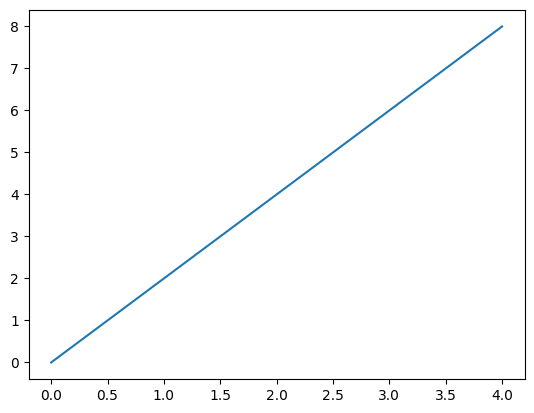

In [197]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

sns.lineplot(x = x, y = y)

In [198]:
df = pd.DataFrame({'x':x, 'y':y})

<Axes: xlabel='x', ylabel='y'>

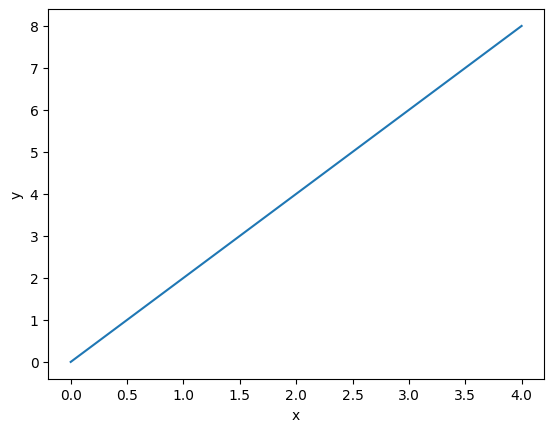

In [199]:
# df를 인자를 주고, 변수를 문자열로 넘겨줘서 사용할 수 있음
sns.lineplot(data=df, x = 'x', y = 'y')

Text(0.5, 1.0, '2')

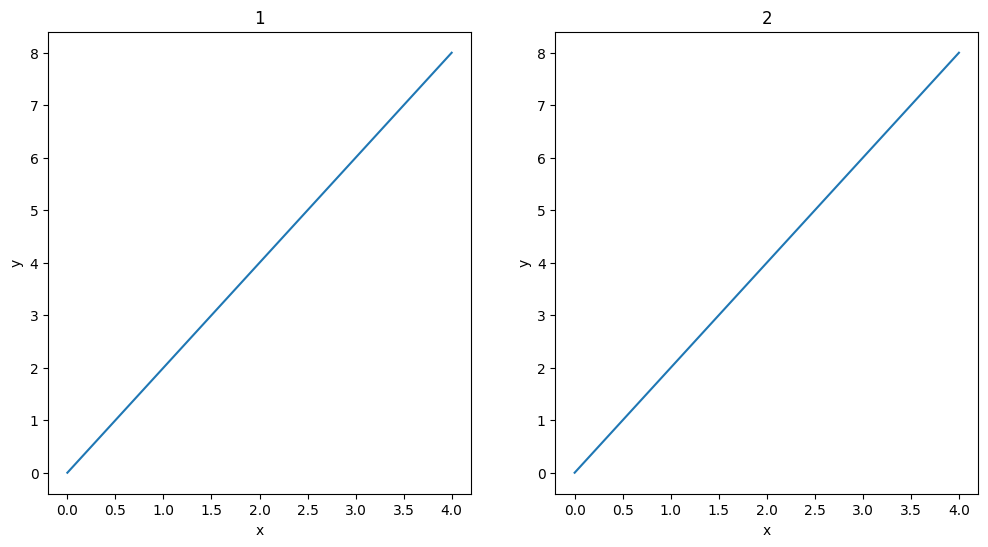

In [200]:
# 복수의 plot을 한번에 그리기

#nrows = 열, ncols = 행 (1,2)개짜리 상자를 만듬
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# 첫 번째 plot
sns.lineplot(data=df, x = 'x', y = 'y', ax=axes[0])
axes[0].set_title('1')

# 두 번째 plot
sns.lineplot(data=df, x = 'x', y = 'y', ax=axes[1])
axes[1].set_title('2')

## 문제 4-1 box plot
`Age`, `Income` 변수에 대해서 각각의 Box plot을 그리고 Treshold를 찾아 Outlier를 제거하시오.


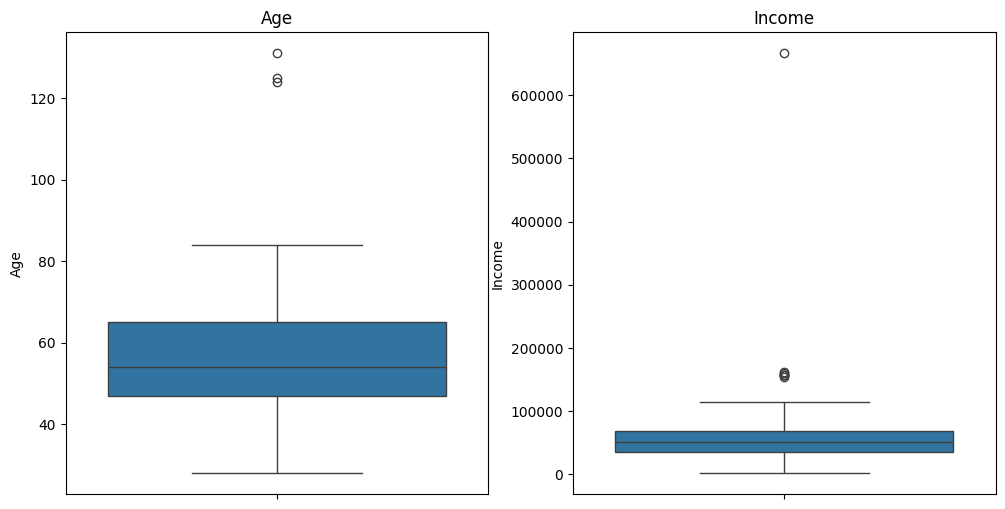

In [201]:
################  문제 4-1  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(y='Age', data=data, ax=axes[0])
axes[0].set_title('Age')

sns.boxplot(y='Income', data=data, ax=axes[1])
axes[1].set_title('Income')

plt.show()

# 각 변수에 대해 IQR (1.5 * (Q3 - Q1)) 값을 계산하고, Q3+IQR을 통해 계산했다.
# boxplot의 형태를 봤을 때, 아랫방향의 threshold가 없어서 Q3+IQR로만 계산했다.
AgeTreshold = data['Age'].quantile(q=0.75, interpolation='lower') + 1.5 * (data['Age'].quantile(0.75) - data['Age'].quantile(0.25))
IncomeTreshold = data['Income'].quantile(q=0.75, interpolation='lower') + 1.5 * (data['Income'].quantile(0.75) - data['Income'].quantile(0.25))

################ 코드 끝  ######################
##############################################
data = data[data.Age < AgeTreshold]
data = data[data.Income < IncomeTreshold]

## 4-2 Histogram plot

`NumWebPurchases`에 대한 히스토그램을 `Marital_Status`을 고려해서 함께 그리시오.

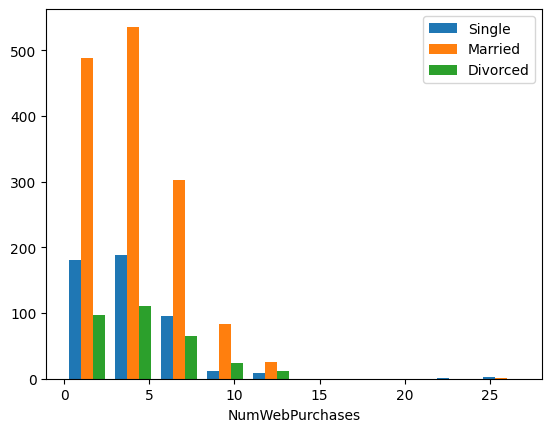

In [202]:
################  문제 4-2  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

# Marital_Status 값에 따라 NumWebPurchases 데이터를 분할했다.
NumWebPurchases = data['NumWebPurchases']
Marital_Status = data['Marital_Status']
hist_data = [NumWebPurchases[Marital_Status == 0], NumWebPurchases[Marital_Status == 1], NumWebPurchases[Marital_Status == 2]]

# Marital_Status 값에 따라 구분지어진 히스토그램을 그린다.
# 현재 Marital_Status는 0, 1, 2로 값이 구분지어져 있지만, 가시성을 위해 Single, Married, Divorced 세 가지로 구분했다.
plt.hist(hist_data, label=['Single', 'Married', 'Divorced'])

# x축 이름 표시
plt.xlabel('NumWebPurchases')

# 각 색깔이 어느 Marital_Status인지 확인할 수 있도록 범례를 추가했다.
plt.legend()

plt.show()

################ 코드 끝  ######################
##############################################


## 4-3 bar plot

X축 `Marital_Status` Y축을 `NumWebPurchases`로 하고 `Response`를 구분해서 bar plot을 그리시오.


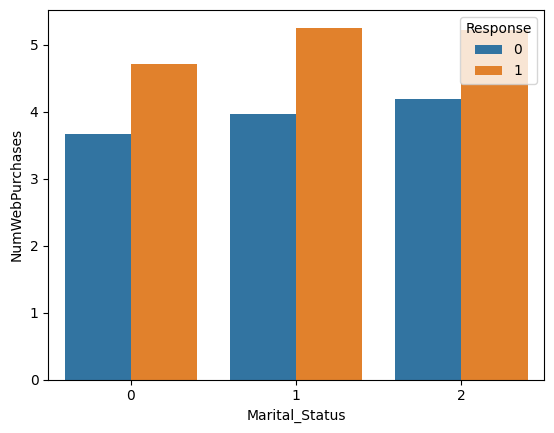

In [203]:
################  문제 4-3  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

# Response 값에 따라 데이터를 두개로 나누었다.
df0 = data[data['Response'] == 0][['Marital_Status', 'NumWebPurchases']]
df1 = data[data['Response'] == 1][['Marital_Status', 'NumWebPurchases']]

# Marital_Status 값에 따라 NumWebPurchases의 평균을 구해서 새 데이터프레임을 만들었다.
df0 = pd.DataFrame(df0.groupby('Marital_Status')['NumWebPurchases'].mean())
df1 = pd.DataFrame(df1.groupby('Marital_Status')['NumWebPurchases'].mean())

# 'Response' 변수를 각각 추가했다.
df0['Response'] = 0
df1['Response'] = 1

# 두 데이터프레임을 합쳤다.
df = pd.concat([df0, df1])

#Response값에 따라 barplot을 그렸다.

sns.barplot(x='Marital_Status', y='NumWebPurchases', data=df, hue='Response')
plt.show()

################ 코드 끝  ######################
##############################################

## 4-4 scatter plot

`Income`과 가장 높은 상관관계(음,양)를 지니는 변수 2개를 선택하여 scatter plot을 그리시오.

In [204]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Gender,Age,Education,Marital_Status,Income,Kidhome,Teenhome,CustomerTenure,Recency_in_Years,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntToyProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer Type,Complain,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
ID,1.000000,0.009176,-0.004888,-0.019926,0.011720,0.001661,0.002702,-0.002839,0.002583,-0.049122,-0.020650,0.007406,-0.000360,-0.022835,-0.006165,0.011976,-0.010391,-0.037051,-0.017914,0.001679,-0.013493,-0.008232,-0.004893,0.031621,-0.021673,-0.021451,0.005665,-0.036143,-0.017787,0.006411
Gender,0.009176,1.000000,-0.037158,-0.000035,0.000454,-0.028263,0.012682,0.002914,0.021172,-0.004534,-0.010272,0.010142,-0.014287,-0.016315,0.027494,0.017857,-0.026734,0.028080,-0.010105,-0.029178,0.000424,0.035057,-0.030860,0.000213,-0.041795,-0.050511,0.036295,-0.012596,-0.012030,-0.005270
Age,-0.004888,-0.037158,1.000000,-0.052028,0.174833,0.211486,-0.234469,0.364148,-0.015731,0.017956,0.162628,0.013360,0.038417,0.042064,0.018938,-0.186095,0.056934,0.074089,0.153410,0.140002,0.138852,-0.119885,0.100175,0.004380,-0.018918,0.007949,0.015468,-0.047727,0.079611,0.016744
Education,-0.019926,-0.000035,-0.052028,1.000000,0.006325,-0.100401,0.028228,-0.052905,0.002796,-0.027019,-0.066124,-0.060026,-0.074275,-0.028544,-0.035974,0.002146,-0.067008,-0.008091,-0.065462,-0.065666,-0.052916,0.034570,-0.040608,-0.009867,-0.018419,-0.027833,0.001378,-0.001999,0.001883,-0.001918
Marital_Status,0.011720,0.000454,0.174833,0.006325,1.000000,0.031384,-0.047104,0.109864,0.009840,-0.001783,0.040752,0.010547,-0.031885,0.000527,0.016693,-0.047563,0.020686,0.044970,0.053044,0.021710,0.032886,0.009063,0.043749,-0.027320,-0.032280,-0.010610,0.029362,-0.016417,0.020055,0.007904
Income,0.001661,-0.028263,0.211486,-0.100401,0.031384,1.000000,-0.527213,0.042271,-0.024815,0.006777,0.728021,0.535246,0.693754,0.549958,0.549835,-0.401369,0.412596,-0.131051,0.493599,0.706752,0.683315,-0.644450,0.595510,-0.027517,0.174419,0.342897,0.049896,-0.080711,0.134591,0.234405
Kidhome,0.002702,0.012682,-0.234469,0.028228,-0.047104,-0.527213,1.000000,-0.036461,-0.054559,0.009144,-0.498230,-0.373563,-0.443248,-0.388645,-0.371720,0.771127,-0.351059,0.231266,-0.365123,-0.517305,-0.504817,0.448826,-0.418458,0.036294,-0.080514,-0.172910,-0.053224,0.048826,-0.120339,-0.134943
Teenhome,-0.002839,0.002914,0.364148,-0.052905,0.109864,0.042271,-0.036461,1.000000,0.018702,0.016246,0.003899,-0.177128,-0.267046,-0.205301,-0.163651,-0.030708,-0.021478,0.395713,0.154624,-0.111976,0.048310,0.133056,0.041254,0.007442,-0.155726,-0.140964,0.013012,-0.022445,0.085171,-0.126410
CustomerTenure,0.002583,0.021172,-0.015731,0.002796,0.009840,-0.024815,-0.054559,0.018702,1.000000,0.026882,0.166294,0.067046,0.092451,0.080650,0.081187,-0.046467,0.160630,0.221229,0.192091,0.095452,0.110164,0.274124,0.173071,0.035850,0.194612,-0.040025,0.005998,0.014683,0.005915,-0.002821
Recency_in_Years,-0.049122,-0.004534,0.017956,-0.027019,-0.001783,0.006777,0.009144,0.016246,0.026882,1.000000,0.016797,-0.003376,0.026651,0.001694,0.023071,0.015062,0.017559,-0.002780,-0.010256,0.030805,0.001671,-0.020849,0.003420,0.005404,-0.199078,-0.019317,0.011617,-0.040577,0.029422,0.006021


In [205]:
# 'response' 컬럼과의 상관 계수 계산
correlation = corr['Response'].abs()

# 절댓값이 0.1 미만인 컬럼 이름 추출
columns_to_drop = correlation[correlation < 0.1].index

# 해당 컬럼들을 데이터프레임에서 제거
data = data.drop(columns=columns_to_drop)

data.columns

Index(['Income', 'Teenhome', 'CustomerTenure', 'Recency_in_Years', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
       'Customer Type', 'Response', 'AcceptedCmp1', 'AcceptedCmp3'],
      dtype='object')

## 문제 5
- **데이터셋 분리**
- **Knn 학습 및 하이퍼파라미터 비교 그래프 그리기**
- **Decision Tree 및 하이퍼파라미터 비교 그래프 그리기**
- **최종 모델 평가 및 비교**

### train set과 test set 나누기

In [206]:
# train과 test set을 나누기 위한 함수
from sklearn.model_selection import train_test_split

In [207]:
# 5-1 . 데이터 스플릿
from sklearn.model_selection import train_test_split
y = data['Response'] # 정답 분리
X = data.drop(columns =['Response']) # Train셋에 정답이 있으면 안됩니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test:train = 8:2

### 문제 5-2
**`DecisionTreeClassifier`**를 사용하여 주어진 조건에 맞게 모델을 학습하고 완성한 코드 및 출력물을 보고서에 캡처하여 업로드하세요.
* 조건 1: 최대 트리의 깊이를 `depth  = [1, 3, 5, 10, 15, 30, 20]`으로 변화에 따른 정확도의 변화를 `line plot`으로 그리고 가장 높은 성능의 `depth`를 출력하시오.
* 조건 2: train set에서 validation set을 나누세요. `train : validation = 7 : 3`

* *주의! : test set이 아닌 validation set으로 평가해야 합니다.*

In [208]:
from sklearn.tree import DecisionTreeClassifier

In [219]:

# validation set을 나누었다.
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train, y_train, test_size=0.3)

depth_set = [1, 3, 5, 10, 15, 20, 30]

# depth별로 실행결과를 저장할 리스트이다.
dt_scores = []

for depth in depth_set:
  # train
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train2, y_train2)

  # valid
  valid = dt.predict(X_valid)

  # score를 구해서 dt_scores에 추가했다.
  score = dt.score(X_valid, y_valid)
  dt_scores.append(score)

# 그래프를 그릴 때, 각 depth값들의 눈금 간격이 일정하도록 만들기 위해서
# num_dep를 1부터 7까지 연속된 자연수로 설정했다.
# plt.xticks(num_dep, depth_set) 코드를 라인플롯 출력함수 뒤에 작성하여
# 그래프가 올바르게 나오도록 할 예정이다.
num_dep = [1, 2, 3, 4, 5, 6, 7]

# 가장 높은 성능의 depth 값을 출력하도록 한다.
depth_set[dt_scores.index(max(dt_scores))]

3

([<matplotlib.axis.XTick at 0x7c549218b070>,
 [Text(1, 0, '1'),
  Text(2, 0, '3'),
  Text(3, 0, '5'),
  Text(4, 0, '10'),
  Text(5, 0, '15'),
  Text(6, 0, '20'),
  Text(7, 0, '30')])

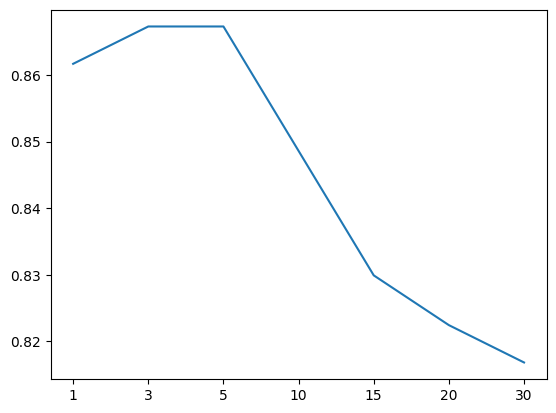

In [220]:
sns.lineplot(x = num_dep, y = dt_scores)
plt.xticks(num_dep, depth_set)

### 문제 5-3
`문제 5-1` 과 `문제 5-2`에서 찾은 best 하이퍼파라미터 (k, max depth)로 두 분류기를 전체 train set 다시 각각 학습하여 test set으로 평가하고 완성한 코드와 출력을 보고서에 캡처하여 업로드하세요.

* 위에서 찾은 최적의 하이퍼파라미터 선택
* 전체 train set으로 분류기 학습
* Test set을 통해서 평가 및 비교

In [221]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [222]:
best_depth = depth_set[dt_scores.index(max(dt_scores))]

best_dt = DecisionTreeClassifier(max_depth=best_depth)
best_dt.fit(X_train, y_train)
y_pred = best_dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8609865470852018
Precision: 0.8333333333333334
Recall: 0.20270270270270271
F1 Score: 0.32608695652173914


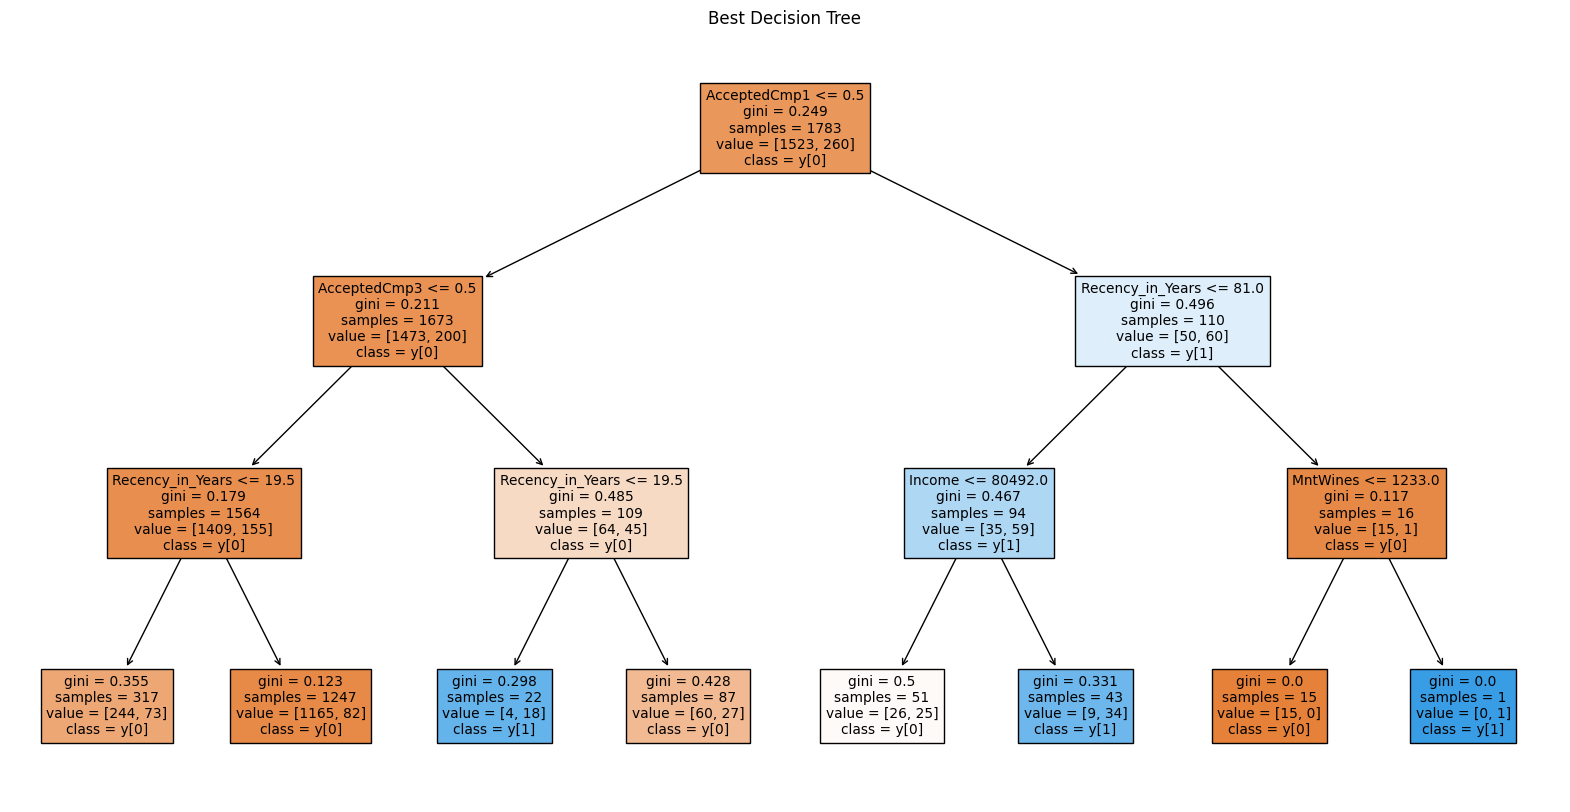

In [223]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# 가장 좋은 Decision Tree 모델을 시각화
plt.figure(figsize=(20,10))
plot_tree(best_dt, filled=True, feature_names=X_train.columns, class_names=True)
plt.title("Best Decision Tree")
plt.show()

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 최종 모델을 학습 데이터 전체로 학습 후 테스트 데이터에서 평가
lr_final = LogisticRegression(max_iter=1000)
lr_final.fit(X_train, y_train)

# 테스트 데이터에서 예측 및 성능 평가
y_pred = lr_final.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8452914798206278
Precision: 0.6190476190476191
Recall: 0.17567567567567569
F1 Score: 0.2736842105263158


In [231]:
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)
lr_l1.fit(X_train, y_train)

# 테스트 데이터에서 예측 및 성능 평가
y_pred_l1 = lr_l1.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_l1))
print("Precision:", precision_score(y_test, y_pred_l1))
print("Recall:", recall_score(y_test, y_pred_l1))
print("F1 Score:", f1_score(y_test, y_pred_l1))

Accuracy: 0.874439461883408
Precision: 0.7142857142857143
Recall: 0.40540540540540543
F1 Score: 0.5172413793103449


In [232]:
lr_l1 = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)
lr_l1.fit(X_train, y_train)

# 테스트 데이터에서 예측 및 성능 평가
y_pred_l1 = lr_l1.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_l1))
print("Precision:", precision_score(y_test, y_pred_l1))
print("Recall:", recall_score(y_test, y_pred_l1))
print("F1 Score:", f1_score(y_test, y_pred_l1))

Accuracy: 0.8452914798206278
Precision: 0.6190476190476191
Recall: 0.17567567567567569
F1 Score: 0.2736842105263158
